<center><img src="https://pec.ac.in/sites/default/files/cover_images/corona_virus_cover_pec_1.jpg"></center>


# <center>Data Visualization</center>

<font size="4">Data visualization is the graphical representation of information and data. By using visual elements like charts, graphs, and maps, data visualization tools provide an accessible way to see and understand trends, outliers, and patterns in data.</font>

<font size="4">In the world of Big Data, data visualization tools and technologies are essential to analyze massive amounts of information and make data-driven decisions.</font>

**<font size="4">The advantages and benefits of good data visualization</font>**

<font size="4">Our eyes are drawn to colors and patterns. We can quickly identify red from blue, square from circle. Our culture is visual, including everything from art and advertisements to TV and movies.</font>

<font size="4">Data visualization is another form of visual art that grabs our interest and keeps our eyes on the message. When we see a chart, we quickly see trends and outliers. If we can see something, we internalize it quickly. It’s storytelling with a purpose. If you’ve ever stared at a massive spreadsheet of data and couldn’t see a trend, you know how much more effective a visualization can be.</font>

## In this Notebook you will see Data Visualization of Covid Dataset across the world.

> #### Note: It is more foccussed on visualization so the dataset is not updated.

## We have use Plotly for this.

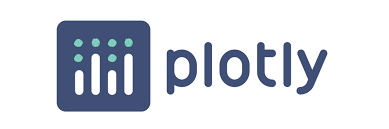

# What is Plotly?

<font size="4">Plotly is a technical computing company headquartered in Montreal, Quebec, that develops online data analytics and visualization tools. Plotly provides online graphing, analytics, and statistics tools for individuals and collaboration, as well as scientific graphing libraries for Python, R, MATLAB, Perl, Julia, Arduino, and REST.</font>



In [ ]:
!pip install chart_studio

In [ ]:
import pandas as pd
import numpy as np
import chart_studio.plotly as py
import cufflinks as cf
import seaborn as sns
import plotly.express as px
%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

## First Loading the Country wise dataset

> #### Let's take a look at the dataset

In [ ]:
country_wise = pd.read_csv('/kaggle/input/corona-virus-report/country_wise_latest.csv')
print("Country Wise Data shape =",country_wise.shape)
country_wise.head()

In [ ]:
country_wise.info()

# Histogram Plot

### Let's Visualize the total deaths for all countries

* Note: Due to large number of countries, I have ploted multiple plots to cover all countries

## Deaths for first 50 countries

In [ ]:
import plotly.graph_objects as go


# Display death due to covid data for various countries 
fig = px.bar(country_wise.head(50), y='Deaths', x='Country/Region', text='Deaths', color='Country/Region')
# Put bar total value above bars with 2 values of precision
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# Set fontsize and uniformtext_mode='hide' says to hide the text if it won't fit
fig.update_layout(uniformtext_minsize=8)
# Rotate labels 45 degrees
fig.update_layout(xaxis_tickangle=-45)
fig

## Deaths for next 50 countries

In [ ]:
fig1 = px.bar(country_wise[50:101], y='Deaths', x='Country/Region', text='Deaths', color='Country/Region')
# Put bar total value above bars with 2 values of precision
fig1.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# Set fontsize and uniformtext_mode='hide' says to hide the text if it won't fit
fig1.update_layout(uniformtext_minsize=8)
# Rotate labels 45 degrees
fig1.update_layout(xaxis_tickangle=-45)
fig1

## Deaths for next 50 countries

In [ ]:
fig1 = px.bar(country_wise[101:151], y='Deaths', x='Country/Region', text='Deaths', color='Country/Region')
# Put bar total value above bars with 2 values of precision
fig1.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# Set fontsize and uniformtext_mode='hide' says to hide the text if it won't fit
fig1.update_layout(uniformtext_minsize=8)
# Rotate labels 45 degrees
fig1.update_layout(xaxis_tickangle=-45)
fig1

## Deaths for next countries

In [ ]:
fig1 = px.bar(country_wise[151:], y='Deaths', x='Country/Region', text='Deaths', color='Country/Region')
# Put bar total value above bars with 2 values of precision
fig1.update_traces(texttemplate='%{text:.2s}', textposition='outside')
# Set fontsize and uniformtext_mode='hide' says to hide the text if it won't fit
fig1.update_layout(uniformtext_minsize=8)
# Rotate labels 45 degrees
fig1.update_layout(xaxis_tickangle=-45)
fig1

## Pie-Chart Representation of total cases in all the coutries of Asia continent

In [ ]:
worldometer = pd.read_csv('/kaggle/input/corona-virus-report/worldometer_data.csv')
worldometer_asia = worldometer[worldometer['Continent'] == 'Asia']


px.pie(worldometer_asia, values='TotalCases', names='Country/Region', 
       title='Population of Asian continent', 
       color_discrete_sequence=px.colors.sequential.RdBu)

## Below showing the animated transition of Confirmed cases from 22 Jan 2020 to July 2020

## Click on the play button to see the animation

In [ ]:
full_grouped = pd.read_csv('/kaggle/input/corona-virus-report/full_grouped.csv')

india = full_grouped[full_grouped['Country/Region'] == 'India']
us = full_grouped[full_grouped['Country/Region'] == 'US']
russia = full_grouped[full_grouped['Country/Region'] == 'Russia']
china = full_grouped[full_grouped['Country/Region'] == 'China']
df = pd.concat([india,us,russia,china], axis=0)

# Watch as bars chart covid cases changes


fig = px.bar(df, x="Country/Region", y="Confirmed", color="Country/Region",
  animation_frame="Date", animation_group="Country/Region", range_y=[0,df['Confirmed'].max() + 100000])

fig.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1

fig

### Below you can see we have plotted a hist plot of death across countries of Asian continent.

#### We can infer that the maximum death is around 40k-45k with count as 1 and of India, you can hover to see of other countries

In [ ]:

# bins represent the number of bars to make
# Can define x label, color, title
# marginal creates another plot (violin, box, rug)

fig = px.histogram(worldometer_asia,x = 'TotalDeaths', nbins=20, 
                   labels={'value':'Total Deaths'},title='Death Distribution of Asia Continent', 
                   marginal='violin',
                   color='Country/Region')

fig.update_layout(
    xaxis_title_text='Total Deaths', showlegend=True
)

## Box Plot Representating Total Cases Distribution across Asia and Europe(Hover for more info)

In [ ]:
# A box plot allows you to compare different variables
# The box shows the quartiles of the data. The bar in the middle is the median 
# The whiskers extend to all the other data aside from the points that are considered
# to be outliers

# Complex Styling
fig = go.Figure()
# Show all points, spread them so they don't overlap and change whisker width
fig.add_trace(go.Box(y=worldometer_asia['TotalCases'], boxpoints='all', name='Asia',
                    fillcolor='blue', jitter=0.5, whiskerwidth=0.2))
fig.add_trace(go.Box(y=worldometer[worldometer['Continent'] == 'Europe']['TotalCases'], boxpoints='all', name='Europe',
                    fillcolor='red', jitter=0.5, whiskerwidth=0.2))
# Change background / grid colors
fig.update_layout(title='Asia vs Europe total cases distribution', 
                  yaxis=dict(gridcolor='rgb(255, 255, 255)',
                 gridwidth=3),
                 paper_bgcolor='rgb(243, 243, 243)',
                 plot_bgcolor='rgb(243, 243, 243)')

## Showing a Globe map which dislays the deaths of all countries in a very informative and interesting way

In [ ]:
import pycountry

worldometer['Country/Region'].replace('USA','United States', inplace=True)
worldometer['Country/Region'].replace('UAE','United Arab Emirates', inplace=True)
worldometer['Country/Region'].replace('Ivory Coast','Côte d\'Ivoire', inplace=True)
worldometer['Country/Region'].replace('S. Korea','Korea', inplace=True)
worldometer['Country/Region'].replace('N. Korea','Korea', inplace=True)
worldometer['Country/Region'].replace('DRC','Republic of the Congo', inplace=True)
worldometer['Country/Region'].replace('Channel Islands','Jersey', inplace=True)

exceptions = []

def get_alpha_3_code(cou):
    try:
        return pycountry.countries.search_fuzzy(cou)[0].alpha_3
    except:
        exceptions.append(cou)


worldometer['iso_alpha'] = worldometer['Country/Region'].apply(lambda x : get_alpha_3_code(x))

# removeing exceptions
for exc in exceptions:
    worldometer = worldometer[worldometer['Country/Region']!=exc]
    
    
fig = px.scatter_geo(worldometer, locations="iso_alpha",
                     color="Continent", # which column to use to set the color of markers
                     hover_name="Country/Region", # column added to hover information
                     size="TotalCases", # size of markers
                     projection="orthographic")
fig

# Thank You

> #### Will add some visualiztion in future